# Предиктивная аналитика SEZEM 2022

## Обработка данных

### Загрузка и предварительная обработка данных

In [16]:
import matplotlib as plt
import numpy as np
import pandas as pd

In [17]:
df = pd.read_csv("./data.csv", delimiter=";", decimal=",")

In [18]:
df = df.drop(columns=["Source", "Alias", "Location", "State", "Unit", "Quality", "QualityStatus"])
df[:5]

,TagName,DateTime,Value
0,WeldindStation1_Robot1_PlusWire_value,20.02.2022 0:00:00.000,26.715
1,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:12:26.634,26.600
2,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:19:26.695,27.800
3,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:44:26.848,26.000
4,WeldindStation1_Robot1_PlusWire_value,21.02.2022 11:58:27.485,26.800


In [19]:
df = df.dropna()
df[:5]

,TagName,DateTime,Value
0,WeldindStation1_Robot1_PlusWire_value,20.02.2022 0:00:00.000,26.715
1,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:12:26.634,26.600
2,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:19:26.695,27.800
3,WeldindStation1_Robot1_PlusWire_value,21.02.2022 10:44:26.848,26.000
4,WeldindStation1_Robot1_PlusWire_value,21.02.2022 11:58:27.485,26.800


In [20]:
df["DateTime"] = pd.to_datetime(df["DateTime"])
df = df.astype({"TagName": "string"})

df.dtypes

TagName             string
DateTime    datetime64[ns]
Value              float64
dtype: object

### Поворот таблицы для работы в формате TimeSeries

In [21]:
df_pivot = pd.pivot_table(df, columns="TagName", values="Value", index="DateTime")
df_pivot

TagName,WeldindStation1_Robot1_PlusWire_value,WeldindStation2_Inverter1_MinusWire_value,WeldindStation2_Inverter1_PlusWire_value,WeldindStation2_Inverter2_MinusWire_value,WeldindStation2_Inverter2_PlusWire_value,WeldindStation2_Robot1Robot2_MinusWire_value,WeldindStation2_Robot2_PlusWire_value
DateTime,,,,,,,
2022-02-20 00:00:00.000,26.715,25.191,24.455,26.091,26.409,23.355,26.891
2022-02-21 10:12:26.634,26.600,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-21 10:12:26.660,NaN,25.100,NaN,NaN,NaN,NaN,NaN
2022-02-21 10:12:26.692,NaN,NaN,24.400,NaN,NaN,NaN,NaN
2022-02-21 10:12:26.713,NaN,NaN,NaN,26.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-03 23:59:09.984,NaN,NaN,25.100,NaN,NaN,NaN,NaN
2022-12-03 23:59:10.009,NaN,NaN,NaN,25.800,NaN,NaN,NaN
2022-12-03 23:59:10.041,NaN,NaN,NaN,NaN,25.600,NaN,NaN


In [22]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2882 entries, 2022-02-20 00:00:00 to 2022-12-03 23:59:10.149000
Data columns (total 7 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   WeldindStation1_Robot1_PlusWire_value         408 non-null    float64
 1   WeldindStation2_Inverter1_MinusWire_value     415 non-null    float64
 2   WeldindStation2_Inverter1_PlusWire_value      415 non-null    float64
 3   WeldindStation2_Inverter2_MinusWire_value     416 non-null    float64
 4   WeldindStation2_Inverter2_PlusWire_value      413 non-null    float64
 5   WeldindStation2_Robot1Robot2_MinusWire_value  413 non-null    float64
 6   WeldindStation2_Robot2_PlusWire_value         414 non-null    float64
dtypes: float64(7)
memory usage: 180.1 KB


In [23]:
df_pivot.to_csv("pivoted.csv")

### Группировка значений датчиков по часовым промежуткам

In [24]:
df_pivot = pd.read_csv("./pivoted.csv")
df_pivot["DateTime"] = pd.to_datetime(df_pivot["DateTime"])
df_pivot.set_index('DateTime', inplace=True)

In [25]:
df_by_hour = df_pivot.resample("1h").mean()
df_by_hour = df_by_hour.dropna(axis=0)

In [33]:
columns = df_by_hour.columns.values.tolist()
columns.pop()

time_grouper = pd.Grouper(freq="1d")
grouped = df_by_hour.groupby(time_grouper)

grouped[columns[0]].apply(list)

by_day =

columns.pop(0)

for col in columns:
    print(by_day.info())
    by_day[col] = grouped[col].apply(list)

by_day

<class 'pandas.core.series.Series'>
DatetimeIndex: 287 entries, 2022-02-20 to 2022-12-03
Freq: D
Series name: WeldindStation1_Robot1_PlusWire_value
Non-Null Count  Dtype 
--------------  ----- 
287 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB
None
<class 'pandas.core.series.Series'>
Index: 288 entries, 2022-02-20 00:00:00 to WeldindStation2_Inverter1_MinusWire_value
Series name: WeldindStation1_Robot1_PlusWire_value
Non-Null Count  Dtype 
--------------  ----- 
288 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB
None
<class 'pandas.core.series.Series'>
Index: 289 entries, 2022-02-20 00:00:00 to WeldindStation2_Inverter1_PlusWire_value
Series name: WeldindStation1_Robot1_PlusWire_value
Non-Null Count  Dtype 
--------------  ----- 
289 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB
None
<class 'pandas.core.series.Series'>
Index: 290 entries, 2022-02-20 00:00:00 to WeldindStation2_Inverter2_MinusWire_value
Series name: WeldindStation1_Robot1_PlusWire_v

DateTime
2022-02-20 00:00:00                                                                      [26.715]
2022-02-21 00:00:00                             [26.8, 26.8, 26.8, 26.8, 26.8, 26.8, 26.8, 26....
2022-02-22 00:00:00                             [26.8, 26.8, 26.8, 26.8, 26.8, 22.6, 27.05, 26...
2022-02-23 00:00:00                             [26.8, 26.8, 26.8, 26.8, 26.8, 26.8, 26.8, 26....
2022-02-24 00:00:00                             [26.8, 26.8, 26.8, 26.8, 26.8, 23.1, 24.299999...
                                                                      ...                        
WeldindStation2_Inverter1_MinusWire_value       DateTime
2022-02-20                           ...
WeldindStation2_Inverter1_PlusWire_value        DateTime
2022-02-20                           ...
WeldindStation2_Inverter2_MinusWire_value       DateTime
2022-02-20                           ...
WeldindStation2_Inverter2_PlusWire_value        DateTime
2022-02-20                           ...
WeldindStat

In [27]:
start_date = '2022-02-20 00:00:00.000'
end_date = '2022-02-21 18:59:59.999'

df_sub = df_by_hour.loc[start_date: end_date]
df_sub

,WeldindStation1_Robot1_PlusWire_value,WeldindStation2_Inverter1_MinusWire_value,WeldindStation2_Inverter1_PlusWire_value,WeldindStation2_Inverter2_MinusWire_value,WeldindStation2_Inverter2_PlusWire_value,WeldindStation2_Robot1Robot2_MinusWire_value,WeldindStation2_Robot2_PlusWire_value
DateTime,,,,,,,
2022-02-20 00:00:00,26.715,25.191000,24.455000,26.091000,26.409000,23.355,26.891
2022-02-21 10:00:00,26.800,25.133333,24.733333,26.050000,26.550000,24.700,27.550
2022-02-21 11:00:00,26.800,26.100000,25.300000,24.400000,25.050000,21.800,25.600
2022-02-21 12:00:00,26.800,25.150000,24.650000,24.550000,26.100000,22.000,26.300
2022-02-21 14:00:00,26.800,26.300000,25.900000,25.850000,26.433333,24.800,27.750
2022-02-21 15:00:00,26.800,26.133333,25.800000,24.966667,26.250000,23.800,26.550
2022-02-21 17:00:00,26.800,26.500000,26.000000,25.600000,27.000000,25.300,27.300
2022-02-21 18:00:00,26.800,26.500000,26.000000,25.600000,27.000000,25.300,27.300


<AxesSubplot:xlabel='DateTime'>

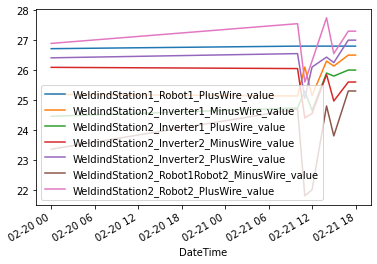

In [28]:
df_sub.plot()

In [29]:
df_sub.between_time("10:00", "18:59")

,WeldindStation1_Robot1_PlusWire_value,WeldindStation2_Inverter1_MinusWire_value,WeldindStation2_Inverter1_PlusWire_value,WeldindStation2_Inverter2_MinusWire_value,WeldindStation2_Inverter2_PlusWire_value,WeldindStation2_Robot1Robot2_MinusWire_value,WeldindStation2_Robot2_PlusWire_value
DateTime,,,,,,,
2022-02-21 10:00:00,26.8,25.133333,24.733333,26.050000,26.550000,24.7,27.55
2022-02-21 11:00:00,26.8,26.100000,25.300000,24.400000,25.050000,21.8,25.60
2022-02-21 12:00:00,26.8,25.150000,24.650000,24.550000,26.100000,22.0,26.30
2022-02-21 14:00:00,26.8,26.300000,25.900000,25.850000,26.433333,24.8,27.75
2022-02-21 15:00:00,26.8,26.133333,25.800000,24.966667,26.250000,23.8,26.55
2022-02-21 17:00:00,26.8,26.500000,26.000000,25.600000,27.000000,25.3,27.30
2022-02-21 18:00:00,26.8,26.500000,26.000000,25.600000,27.000000,25.3,27.30


,WeldindStation1_Robot1_PlusWire_value,WeldindStation2_Inverter1_MinusWire_value,WeldindStation2_Inverter1_PlusWire_value,WeldindStation2_Inverter2_MinusWire_value,WeldindStation2_Inverter2_PlusWire_value,WeldindStation2_Robot1Robot2_MinusWire_value,WeldindStation2_Robot2_PlusWire_value
DateTime,,,,,,,
2022-02-21 10:00:00,26.8,25.133333,24.733333,26.050000,26.550000,24.7,27.55
2022-02-21 11:00:00,26.8,26.100000,25.300000,24.400000,25.050000,21.8,25.60
2022-02-21 12:00:00,26.8,25.150000,24.650000,24.550000,26.100000,22.0,26.30
2022-02-21 14:00:00,26.8,26.300000,25.900000,25.850000,26.433333,24.8,27.75
2022-02-21 15:00:00,26.8,26.133333,25.800000,24.966667,26.250000,23.8,26.55
2022-02-21 17:00:00,26.8,26.500000,26.000000,25.600000,27.000000,25.3,27.30
2022-02-21 18:00:00,26.8,26.500000,26.000000,25.600000,27.000000,25.3,27.30


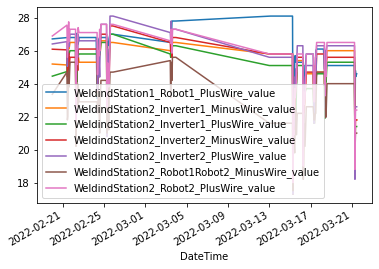

In [30]:
df_by_hour.loc['2022-02-20 00:00:00.000': '2022-03-30 23:59:10.149'].plot()
df_by_hour.to_csv("hourly.csv")
df_sub[(df_sub.index.hour >= 10) & (df_sub.index.hour <= 18)]

<AxesSubplot:xlabel='DateTime'>

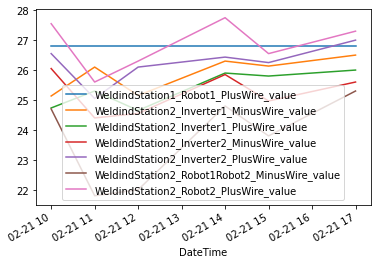

In [32]:
df_sub[(df_sub.index.hour >= 9) & (df_sub.index.hour <= 17)].plot()